# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
path = "../data/raw/sales_ads_train.csv"
df = pd.read_csv(path)

In [19]:
path = "../data/raw/sales_ads_test.csv"
df_test = pd.read_csv(path)

In [16]:
df.isnull().sum()

ID                                0
Cena                              0
Waluta                         3376
Stan                           3322
Marka_pojazdu                  3351
Model_pojazdu                  3309
Wersja_pojazdu                48061
Generacja_pojazdu             41660
Rok_produkcji                  3407
Przebieg_km                    4003
Moc_KM                         3733
Pojemnosc_cm3                  4686
Rodzaj_paliwa                  3410
Emisja_CO2                    75900
Naped                         13054
Skrzynia_biegow                3775
Typ_nadwozia                   3359
Liczba_drzwi                   4364
Kolor                          3463
Kraj_pochodzenia              60420
Pierwszy_wlasciciel           94514
Data_pierwszej_rejestracji    80698
Data_publikacji_oferty         3449
Lokalizacja_oferty             3341
Wyposazenie                    3253
dtype: int64

In [24]:
df["Rodzaj_paliwa"].unique()

array(['Gasoline', nan, 'Diesel', 'Gasoline + LPG', 'Hybrid', 'Electric',
       'Gasoline + CNG', 'Hydrogen', 'Ethanol'], dtype=object)

In [23]:
df_test["Rodzaj_paliwa"].unique()

array(['Diesel', 'Gasoline', 'Gasoline + LPG', 'Hybrid', 'Electric',
       'Gasoline + CNG', 'Ethanol'], dtype=object)

In [17]:
len(df.index)

135397

In [7]:
df[["Moc_KM", "Pojemnosc_cm3", "Emisja_CO2"]]

,Moc_KM,Pojemnosc_cm3,Emisja_CO2
0,170.0,1998.0,232.0
1,110.0,1598.0,159.0
2,136.0,1598.0,NaN
3,90.0,1560.0,118.0
4,NaN,1798.0,152.0
...,...,...,...
135392,150.0,1598.0,127.0
135393,237.0,1950.0,165.0
135394,120.0,1700.0,NaN
135395,60.0,1149.0,NaN


In [11]:
def make_price_average_chart(df, column, xlabel):
    avg_price = df.groupby(column)['Cena'].mean() # .sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel("Average price")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


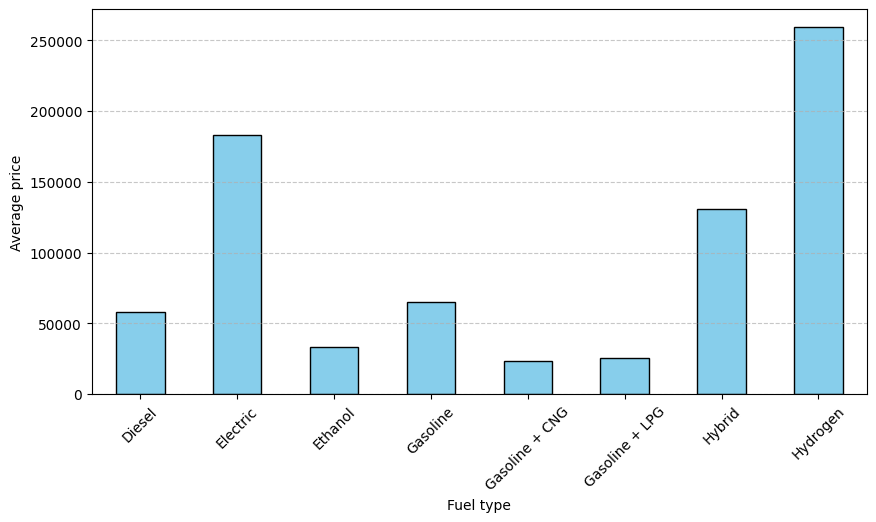

In [17]:
make_price_average_chart(df, 'Rodzaj_paliwa', "Fuel type")

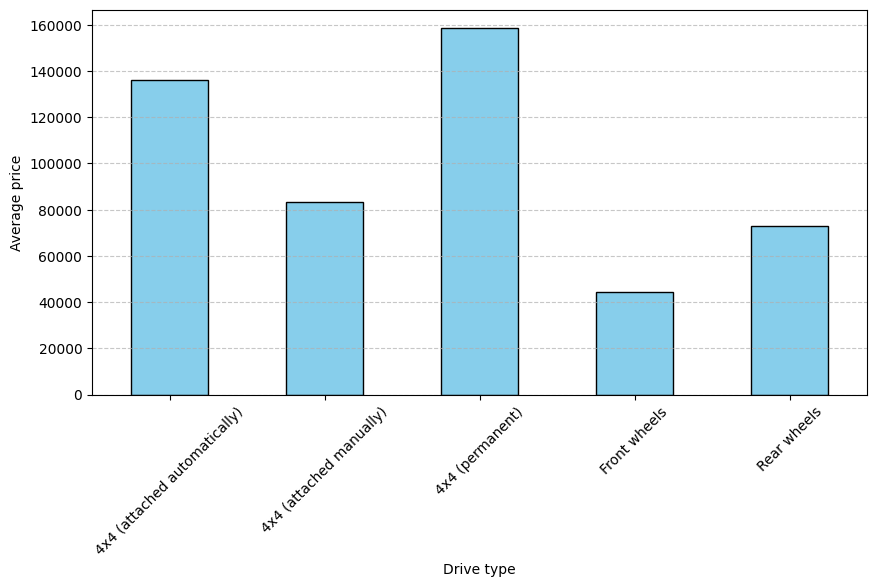

In [ ]:
make_price_average_chart(df, 'Naped', "Drive type")

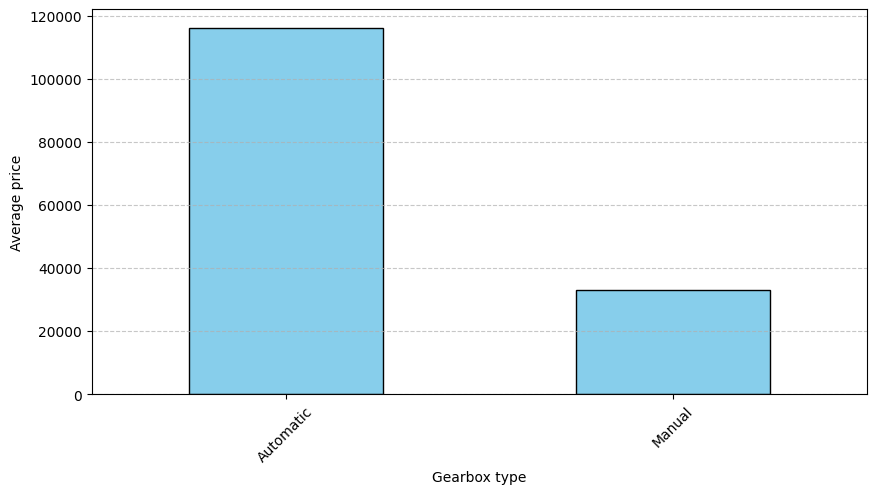

In [16]:
make_price_average_chart(df, 'Skrzynia_biegow', "Gearbox type")

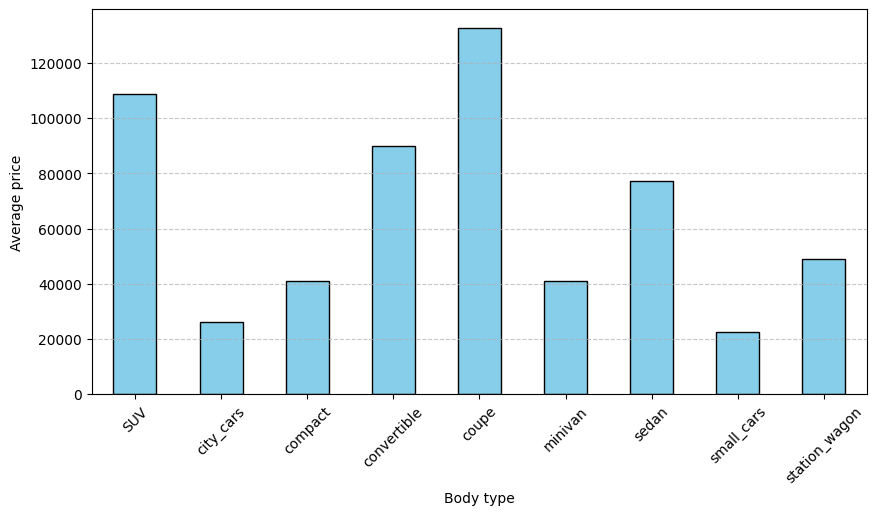

In [15]:
make_price_average_chart(df, 'Typ_nadwozia', "Body type")

In [4]:
avg_price_not_null = df.loc[df["Wersja_pojazdu"].notnull(), "Cena"].mean()
avg_price_null = df.loc[df["Wersja_pojazdu"].isnull(), "Cena"].mean()

print(f"Average price where Wersja_pojazdu is NOT null: {avg_price_not_null}")
print(f"Average price where Wersja_pojazdu is null: {avg_price_null}")

Average price where Wersja_pojazdu is NOT null: 59550.78078913621
Average price where Wersja_pojazdu is null: 69463.3594598531


In [5]:
avg_price_not_null = df.loc[df["Generacja_pojazdu"].notnull(), "Cena"].mean()
avg_price_null = df.loc[df["Generacja_pojazdu"].isnull(), "Cena"].mean()

print(f"Average price where Generacja_pojazdu is NOT null: {avg_price_not_null}")
print(f"Average price where Generacja_pojazdu is null: {avg_price_null}")

Average price where Generacja_pojazdu is NOT null: 54512.088332248735
Average price where Generacja_pojazdu is null: 82323.7130580893


In [18]:
df["Marka_pojazdu"].unique(), df["Marka_pojazdu"].nunique()

(array(['Renault', 'Opel', 'Ford', 'Toyota', 'BMW', 'Audi', 'Volkswagen',
        'Hyundai', 'Kia', 'Nissan', 'Dacia', 'Mazda', 'Volvo', 'Daewoo',
        'Fiat', 'Jaguar', 'Škoda', 'Mitsubishi', 'Peugeot', 'Seat',
        'Porsche', 'Honda', 'Jeep', nan, 'Citroën', 'Mercedes-Benz',
        'Chevrolet', 'Subaru', 'MINI', 'Alfa Romeo', 'DS Automobiles',
        'Smart', 'Suzuki', 'Buick', 'Ferrari', 'Saab', 'Land Rover',
        'Lancia', 'Cadillac', 'Infiniti', 'Aixam', 'Chrysler', 'SsangYong',
        'Lexus', 'Dodge', 'McLaren', 'Gaz', 'Lada', 'Triumph', 'Lincoln',
        'Daihatsu', 'Pontiac', 'Rover', 'Hummer', 'Tesla', 'Chatenet',
        'Wołga', 'Microcar', 'Cupra', 'Maserati', 'RAM', 'Isuzu', 'MG',
        'Warszawa', 'Polonez', 'Acura', 'Moskwicz', 'Rolls-Royce',
        'Ligier', 'Abarth', 'Inny', 'Bentley', 'Trabant', 'Austin',
        'Mercury', 'DFSK', 'Aston Martin', 'GMC', 'DKW', 'Tarpan', 'Uaz',
        'FAW', 'Lotus', 'Plymouth', 'Tata', 'Żuk', 'Zastava', 'Alpine',
  

In [19]:
top_marks = df['Marka_pojazdu'].value_counts().head().index
top_marks

Index(['Volkswagen', 'BMW', 'Audi', 'Opel', 'Ford'], dtype='object', name='Marka_pojazdu')

In [20]:
filtered_df = df[df['Marka_pojazdu'].isin(top_marks)]
avg_price = filtered_df.groupby('Marka_pojazdu')['Cena'].mean() # .sort_values(ascending=False)
avg_price

Marka_pojazdu
Audi           92498.103040
BMW           100603.342171
Ford           47487.043236
Opel           32336.330889
Volkswagen     52661.827489
Name: Cena, dtype: float64

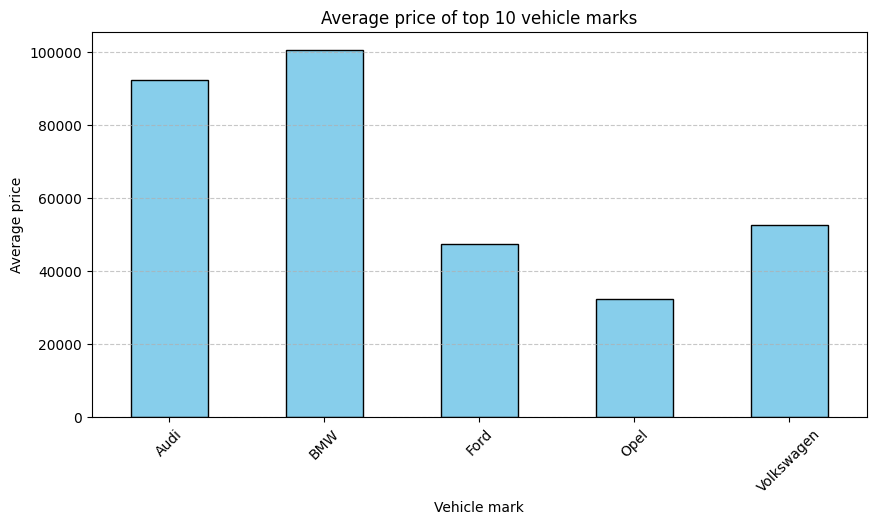

In [21]:
plt.figure(figsize=(10, 5))
avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average price of top 10 vehicle marks")
plt.xlabel("Vehicle mark")
plt.ylabel("Average price")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
porsche = df[df['Marka_pojazdu'] == 'Porsche'].sort_values("Cena")
porsche.head(5)

,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,...,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
34305,34306,15500,PLN,Used,Porsche,Cayenne,NaN,I (2002-2010),2003.0,213450.0,...,Automatic,SUV,5.0,silver,Poland,NaN,30/12/2003,25/04/2021,"Warszawa, Mazowieckie, Śródmieście","['ABS', 'Electric front windows', 'Drivers air..."
100662,100663,16999,PLN,Used,Porsche,Cayenne,NaN,I (2002-2010),2005.0,209000.0,...,Automatic,SUV,5.0,silver,NaN,NaN,NaN,28/04/2021,"Koninko, poznański, Wielkopolskie",[]
10207,10208,19900,PLN,Used,Porsche,Cayenne,NaN,I (2002-2010),2005.0,170000.0,...,Automatic,SUV,5.0,gray,Germany,NaN,NaN,30/04/2021,"św Barbary 6 - 39-400 Tarnobrzeg, Podkarpackie...","['ABS', 'Electric front windows', 'Drivers air..."
115246,115247,23256,PLN,Used,Porsche,Cayenne,NaN,I (2002-2010),2003.0,297000.0,...,Automatic,SUV,5.0,other,Austria,NaN,03/02/2003,03/05/2021,"Kraków, Małopolskie, Dębniki","['ABS', 'Electric front windows', 'Drivers air..."
48219,48220,23800,PLN,Used,Porsche,Cayenne,NaN,I (2002-2010),2004.0,246938.0,...,Automatic,SUV,5.0,black,NaN,NaN,NaN,30/04/2021,"Kalisz, Wielkopolskie","['ABS', 'Electric front windows', 'Drivers air..."


In [23]:
porsche.tail(5)

,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,...,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
41349,41350,1176396,PLN,New,Porsche,Panamera,NaN,NaN,2021.0,NaN,...,Automatic,sedan,5.0,black,NaN,NaN,NaN,29/04/2021,"ul. Kochłowicka 103 - 40-818 Katowice, Załęska...","['ABS', 'Electric front windows', 'Leather uph..."
59016,59017,1200000,PLN,Used,Porsche,911,NaN,NaN,2016.0,21.0,...,Automatic,coupe,NaN,other,Poland,NaN,10/03/2020,02/05/2021,"Bocheńskiego 109 - 40-816 Katowice, Śląskie (P...","['ABS', 'Electric rear windows', 'Immobilizer'..."
63452,63453,1256214,PLN,New,Porsche,911,Turbo S,992 (2019-),2021.0,1.0,...,Automatic,coupe,2.0,red,Poland,NaN,NaN,04/05/2021,"Bartoszewskiego 15 - 93-341 Łódź, Łódzkie (Pol...",[]
102550,102551,1360000,PLN,Used,Porsche,911,Turbo S,992 (2019-),2020.0,3900.0,...,Automatic,coupe,2.0,gray,Poland,Yes,17/07/2020,03/05/2021,"Żory, Śląskie",[]
76328,76329,2583000,PLN,NaN,Porsche,911,NaN,991 (2011-2018),2019.0,40.0,...,Automatic,coupe,2.0,white,Poland,Yes,12/11/2019,30/04/2021,"Warszawska 67 - 61-028 Poznań, Nowe Miasto (Po...",[]


In [24]:
df["Stan"].unique()

array(['Used', 'New', nan], dtype=object)

In [25]:
df['Stan'].value_counts(), df['Stan'].isna().sum()

(Stan
 Used    115824
 New      16251
 Name: count, dtype: int64,
 np.int64(3322))

In [26]:
df[df["Stan"].isna()]

,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,...,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
28,29,18999,PLN,NaN,Ford,Focus,NaN,Mk3 (2010-),2010.0,141000.0,...,Manual,compact,3.0,silver,NaN,Yes,01/06/2010,30/04/2021,"Ks. Franciszka Pędzicha 30 - 42-480 Poręba, za...","['ABS', 'Electric front windows', 'Drivers air..."
120,121,14999,PLN,NaN,Peugeot,508,1.6 e-HDi Active S&S,NaN,2013.0,189000.0,...,Automatic,sedan,4.0,blue,France,NaN,16/08/2013,27/04/2021,ul. Bielska 328 (dawna trasa Bielsko-Cieszyn) ...,"['ABS', 'Electric front windows', 'Drivers air..."
212,213,99900,PLN,NaN,Hyundai,Tucson,NaN,II (2015-),2021.0,10.0,...,Manual,SUV,5.0,brown,NaN,NaN,NaN,01/05/2021,ul. Wojska Polskiego 264 - 97-300 Piotrków Try...,NaN
253,254,49999,PLN,NaN,Opel,Insignia,2.0 CDTI Cosmo ecoFLEX S&S,A (2008-2017),2014.0,126977.0,...,Automatic,sedan,5.0,black,Poland,NaN,06/06/2014,28/04/2021,"Brzozowa 1 - 95-030 Rzgów, łódzki wschodni, Łó...","['ABS', 'Electric front windows', 'Drivers air..."
254,255,68500,PLN,NaN,Mercedes-Benz,Klasa E,220 T CDI 7G-TRONIC,W212 (2009-2016),2013.0,221000.0,...,Automatic,station_wagon,5.0,white,Austria,NaN,02/01/2014,03/05/2021,"Grudziądz, Kujawsko-pomorskie","['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135121,135122,93000,PLN,NaN,Volkswagen,T-Cross,1.0 TSI Life DSG,NaN,2021.0,5.0,...,Automatic,SUV,5.0,white,Poland,NaN,NaN,02/05/2021,"Grochowska 163 - 04-111 Warszawa, Praga-Połudn...",['Manual air conditioning']
135243,135244,5800,PLN,NaN,Opel,Corsa,NaN,C (2000-2006),2003.0,136000.0,...,Manual,city_cars,3.0,blue,Germany,NaN,19/02/2003,01/05/2021,"Radomsko, radomszczański, Łódzkie","['ABS', 'Immobilizer', 'Factory radio', 'Front..."
135294,135295,11900,PLN,NaN,Fiat,Doblo,NaN,I (2000-2010),2008.0,155340.0,...,Manual,minivan,5.0,NaN,NaN,NaN,NaN,28/04/2021,"Opolska 114 - 52-014 Wrocław, Dolnośląskie (Po...",[]
135365,135366,11000,PLN,NaN,Seat,Leon,1.9 TDI Sport Limited,I (1999-2005),2004.0,255000.0,...,Manual,compact,5.0,NaN,NaN,Yes,NaN,02/05/2021,"ul. 1 Maja 333 - 41-710 Ruda Śląska, Śląskie (...","['ABS', 'Electric front windows', 'Drivers air..."


In [27]:
len(df.loc[(df["Stan"] == "New") & (df["Przebieg_km"].isna())])

1034

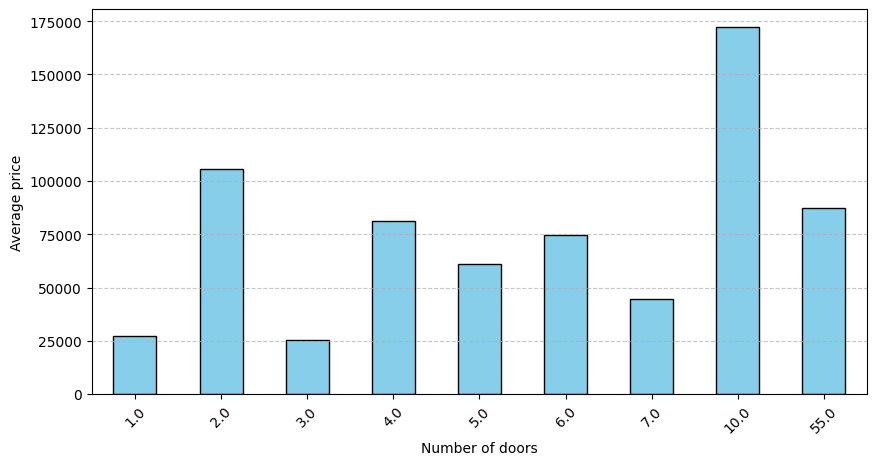

In [28]:
avg_price = df.groupby('Liczba_drzwi')['Cena'].mean()
plt.figure(figsize=(10, 5))
avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Number of doors")
plt.ylabel("Average price")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
df["Liczba_drzwi"].value_counts()

Liczba_drzwi
5.0     100557
4.0      17607
3.0       8208
2.0       4619
6.0         32
7.0          4
1.0          3
55.0         2
10.0         1
Name: count, dtype: int64

In [30]:
porsche["Model_pojazdu"].unique()

array(['Cayenne', '944', '924', 'Boxster', '911', '914', 'Panamera',
       '356', nan, '968', 'Cayman', 'Macan', '718 Cayman', '718 Boxster',
       'Taycan', 'Other'], dtype=object)

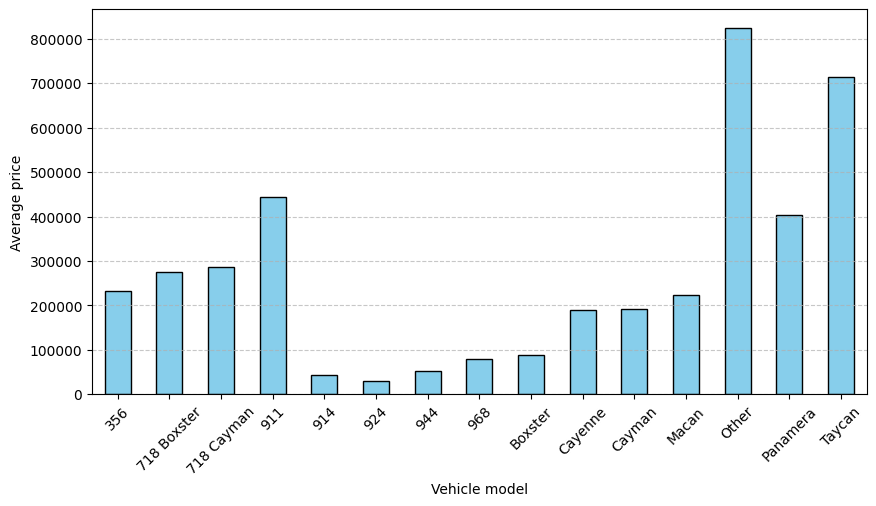

In [31]:
avg_price = porsche.groupby('Model_pojazdu')['Cena'].mean()
plt.figure(figsize=(10, 5))
avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Vehicle model")
plt.ylabel("Average price")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()